# Import libraries

In [353]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Formulation of the problem and methods
### I.	Generate a random adjacency matrix for a simple undirected unweighted graph with 100 vertices and 200 edges (note that the matrix should be symmetric and contain only 0s and 1s as elements). Transfer the matrix into an adjacency list. Visualize the graph and print several rows of the adjacency matrix and the adjacency list. Which purposes is each representation more convenient for?
### II.	Use Depth-first search to find connected components of the graph and Breadth-first search to find a shortest path between two random vertices. Analyse the results obtained.
### III.	Describe the data structures and design techniques used within the algorithms.


# Part 1

In [371]:
# Generate a random symmetric adjacency matrix
# squared matrix is symmetric if a(i, j) == a(j, i) or M = M^T

n_vertices = 100
n_edges = 200

def make_symmetric_adjency_matrix(n_vertices, n_edges):
    matrix = np.zeros((n_vertices, n_vertices))

    while n_edges != 0:
        i, j = np.random.randint(0,99), np.random.randint(0,99)
        if i != j and matrix[i, j] != 1:
            matrix[i, j], matrix[j, i] = 1, 1
            n_edges -= 1
    return matrix

adj_matrix = make_symmetric_adjency_matrix(n_vertices, n_edges)
print('Is matrix symmetric:', np.array_equal(adj_matrix, adj_matrix.transpose()), '\n',
      'Is matrix squared: ', adj_matrix.shape, '\n', 'Number of 1s:', adj_matrix.sum())

Is matrix symmetric: True 
 Is matrix squared:  (100, 100) 
 Number of 1s: 400.0


In [373]:
# Adjacency list
adj_list = {v:[] for v in range(n_vertices)}
for v in adj_list.keys():
    for i in range(n_vertices):
        if adj_matrix[v, i] == 1:
            adj_list[v].append(i)
adj_list

{0: [12, 37, 40, 49, 59, 69],
 1: [2, 20, 28, 37, 53, 96],
 2: [1, 12, 25, 35, 54, 57, 64, 84, 93],
 3: [42, 61, 84],
 4: [17, 53, 62, 65, 85],
 5: [10],
 6: [40, 57, 95],
 7: [58, 68, 80, 97],
 8: [29],
 9: [12, 69],
 10: [5, 56, 57, 73],
 11: [35, 36, 47, 78, 83],
 12: [0, 2, 9, 24, 43, 52, 87],
 13: [37, 74, 98],
 14: [30, 40, 42, 72, 78],
 15: [54, 63, 87],
 16: [48, 78, 82],
 17: [4, 71, 91],
 18: [49],
 19: [35, 43, 58, 95],
 20: [1, 24, 31, 39, 63, 67],
 21: [],
 22: [24, 27, 82, 95],
 23: [68, 91, 98],
 24: [12, 20, 22, 26, 69, 70],
 25: [2, 48, 58, 72, 80],
 26: [24, 50, 68],
 27: [22, 31, 35, 53],
 28: [1, 64],
 29: [8, 37, 48, 69],
 30: [14, 32, 95],
 31: [20, 27, 70, 89],
 32: [30],
 33: [53],
 34: [40, 41],
 35: [2, 11, 19, 27, 44, 75, 81, 94],
 36: [11, 66, 85],
 37: [0, 1, 13, 29, 41, 55],
 38: [],
 39: [20, 41, 61, 71, 80, 94],
 40: [0, 6, 14, 34, 95],
 41: [34, 37, 39, 69, 84, 91],
 42: [3, 14, 48, 58, 66],
 43: [12, 19, 46, 49, 61],
 44: [35, 65],
 45: [79, 98],
 46: 

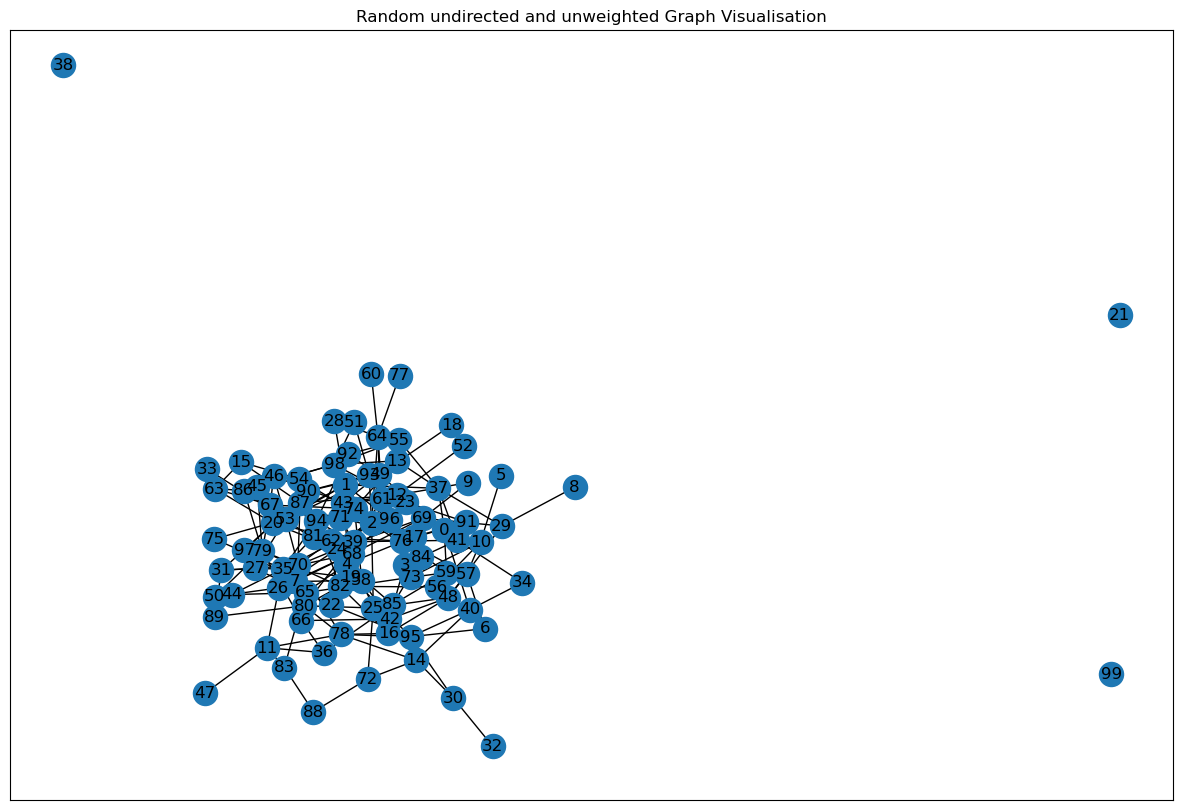

In [432]:
# Visualisation of the graph
G = nx.from_numpy_array(adj_matrix)

plt.figure(figsize=(15, 10))
plt.title('Random undirected and unweighted Graph Visualisation')
nx.draw_networkx(G, pos=nx.spring_layout(G), with_labels=True)

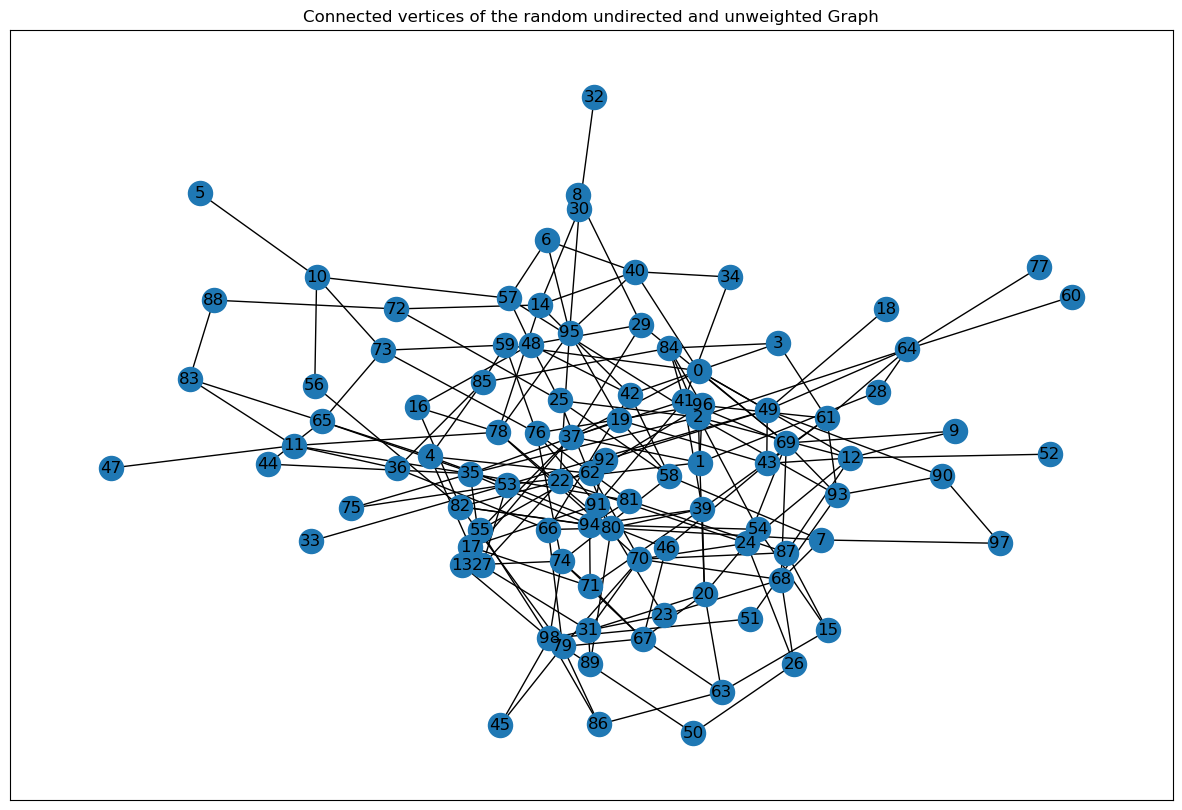

In [433]:
# Graph visualisation vertices with the edges
not_null_verticles = {}
for k in adj_list.keys():
    if len(adj_list[k]) !=0:
        not_null_verticles[k] = adj_list[k]

plt.figure(figsize=(15, 10))
plt.title('Connected vertices of the random undirected and unweighted Graph')
nx.draw_networkx(G, pos=nx.spring_layout(G), with_labels=True, nodelist = not_null_verticles)

In [375]:
# Several rows of adjacency matrix and adjacency list

for i in range(3):
    vertices = np.random.randint(0, 99)
    print(f'Random row of adjacency matrix - {vertices} :', adj_matrix[vertices], '\n',
          f'Random vertices of adjacency list - {vertices} :', adj_list[vertices], '\n')

Random row of adjacency matrix - 92 : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0.] 
 Random vertices of adjacency list - 92 : [49, 55, 94] 

Random row of adjacency matrix - 98 : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.] 
 Random vertices of adjacency list - 98 : [13, 23, 45, 51, 55, 74, 86] 

Random row of adjacency matrix - 91 : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.

### Adjacency matrix is very hard to read in case of big number of vertices. For a sparse graph, i.e. a graph in which most pairs of vertices are not connected by edges, |E| << |V|^2, the adjacency list is significantly more efficient to store than the adjacency matrix.

# Part 2. Use Depth-first search to find connected components of the graph and Breadth-first search to find a shortest path between two random vertices. Analyse the results obtained.

## Import data for Part 2.

In [419]:
visited = list() # Set to keep track of visited nodes of graph.

def dfs(visited, graph, node): # Depth-first search
    if node not in visited:
        visited.append(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)
    return visited
# Driver Code
alg_dfs = dfs(visited, adj_list, 80)

print(f"Number of vertices - {n_vertices} \n"
      f"Number of connected vertices - {len(alg_dfs)}\n",
      alg_dfs)

Number of vertices - 100 
Number of connected vertices - 97
 [80, 7, 58, 19, 35, 2, 1, 20, 24, 12, 0, 37, 13, 74, 67, 46, 43, 49, 18, 53, 4, 17, 71, 39, 41, 34, 40, 6, 57, 10, 5, 56, 82, 16, 48, 25, 72, 14, 30, 32, 95, 22, 27, 31, 70, 62, 96, 61, 3, 42, 66, 36, 11, 47, 78, 83, 65, 44, 73, 59, 76, 81, 87, 15, 54, 94, 92, 55, 98, 23, 68, 26, 50, 79, 45, 86, 63, 69, 9, 29, 8, 93, 51, 90, 97, 91, 85, 84, 88, 64, 28, 60, 77, 89, 33, 75, 52]


In [420]:
# Breadth-first search
def BFS_SP(graph, start, dist):
    visited = []

    queue = [[start]]

    while queue:
        path = queue.pop(0)
        node = path[-1]

        if node not in visited:
            neighbours = graph[node]

            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)

                if neighbour == dist:
                    print("Shortest path = ", *new_path)
                    return
            visited.append(node)


    print("Path doesn't exist")
    return

In [421]:
random_vertices = np.random.randint(0, 99, size=2)
BFS_SP(adj_list, random_vertices[0], random_vertices[1])

Shortest path =  36 11 78 16
